train: 
x (60000, 28, 28)
y (60000,)
test: 
x (10000, 28, 28)
y (10000, 28, 28)


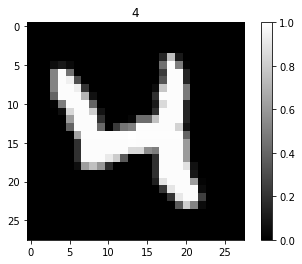

In [99]:
from tensorflow.keras.datasets import mnist 
from matplotlib import pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

n = 20
plt.imshow(x_train[n,:,:], cmap="gray")
plt.title(y_train[n])
plt.colorbar()

print("train: ")
print("x", x_train.shape)
print("y", y_train.shape)

print("test: ")
print("x", x_test.shape)
print("y", x_test.shape)


In [88]:
16*16*16

4096

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import classification_report
import numpy as np 

n_units = 20
N_epoch = 50
# model
model = Sequential()

# input
model.add( Flatten( input_shape=(28,28)))

# hidden
model.add( Dense( units=32, activation='relu'))
model.add( Dropout(0.25) )
model.add( Dense( units=32, activation='relu'))
model.add( Dropout(0.25) )
# model.add( Dense( units=15, activation='relu'))
# model.add( Dense( units=10, activation='relu'))

# output 
model.add( Dense( units=10, activation='softmax'))

# compile
model.compile(
    optimizer="adam", 
    loss="sparse_categorical_crossentropy", 
    metrics= ["accuracy"]
    )

# fit 
history = model.fit( x_train, 
          y_train, 
          batch_size=128, 
          epochs=N_epoch, 
          validation_data=(x_test, y_test),
          verbose=0
          )

# predict 
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=-1)


313/313 [==============================] - 0s 617us/step


In [90]:
print( classification_report( y_test, y_pred_class ) )

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.95      0.96      1010
           4       0.95      0.97      0.96       982
           5       0.96      0.96      0.96       892
           6       0.96      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.95      0.95      0.95       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [91]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 32)                25120     
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                1056      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_31 (Dense)            (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 2650

In [92]:
# tf.keras.utils.plot_model(
#     model,
#     to_file="model.png",
#     show_shapes=False,
#     show_dtype=False,
#     show_layer_names=True,
#     rankdir="TB",
#     expand_nested=False,
#     dpi=96,
#     layer_range=None,
#     show_layer_activations=False,
#     show_trainable=False,
# )

(-0.5, 356.5, 736.5, -0.5)

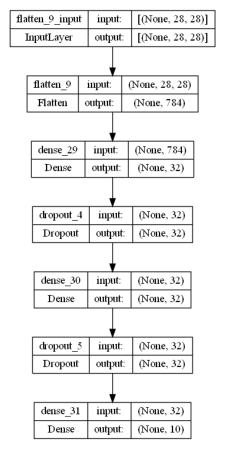

In [93]:
from tensorflow.keras.utils import plot_model 

plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)

im = plt.imread("model.png")
plt.figure(figsize=(16,8))
plt.imshow(im)
plt.axis('off')


(-0.5, 3311.5, 1805.5, -0.5)

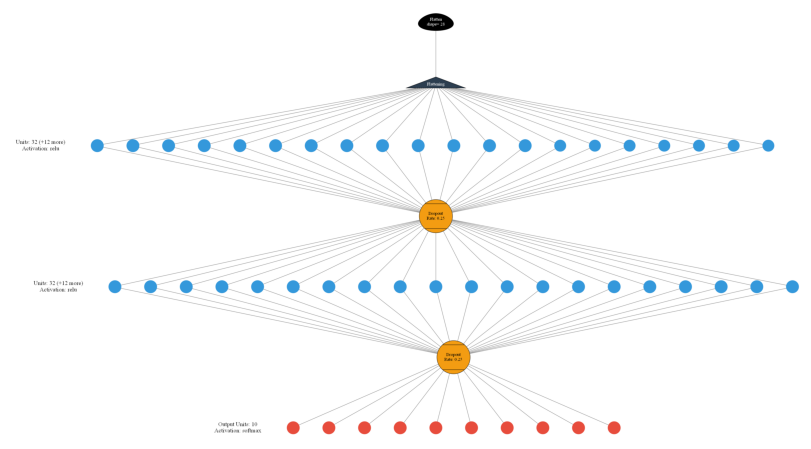

In [94]:
from keras_visualizer import visualizer

visualizer(model, 
           file_name='graph', 
           file_format='png', 
           settings={'MAX_NEURONS': 20})
im = plt.imread("graph.png")
plt.figure(figsize=(16,8))
plt.imshow(im)
plt.axis('off')

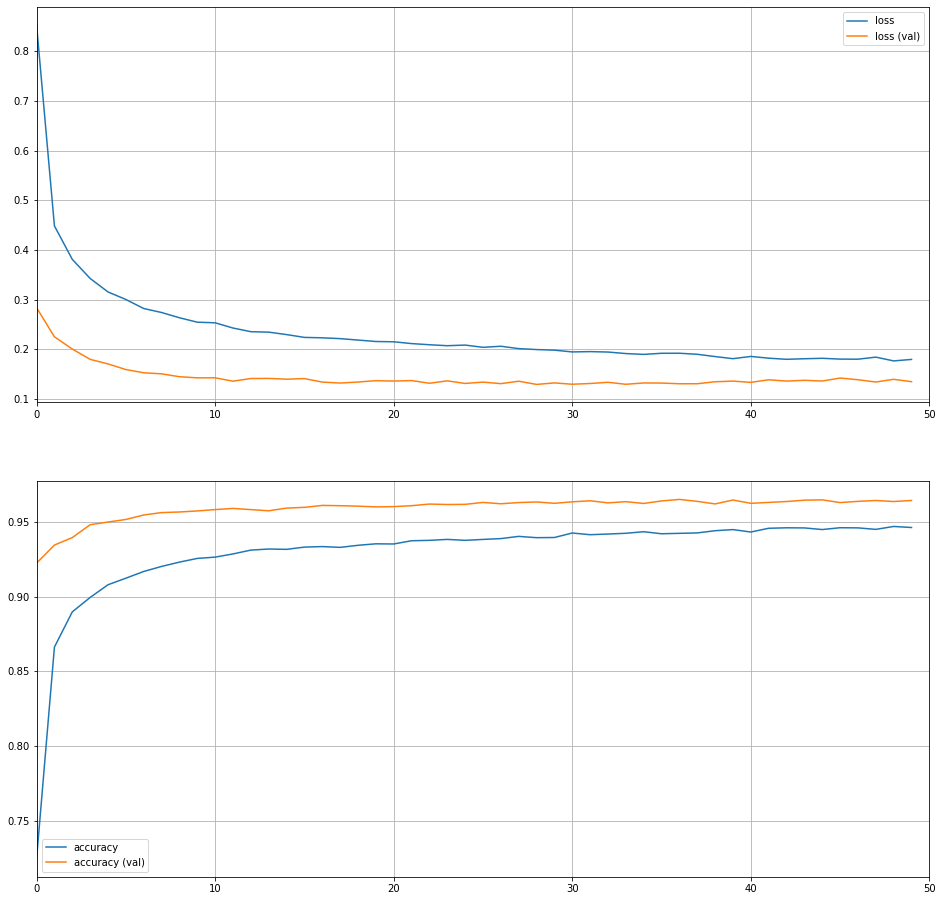

In [95]:
# type(model.history.history)
history.history.keys()

plt.figure(figsize=(16,16))
plt.subplot(211)
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="loss (val)")
plt.grid()
plt.xlim( (0,N_epoch) )
plt.legend()

plt.subplot(212)
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="accuracy (val)")
plt.grid()
plt.xlim( (0,N_epoch) )
plt.legend()


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

In [100]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Input 

input_shape = (28,28,1)

x_train_conv = np.expand_dims(x_train, -1)
x_test_conv = np.expand_dims(x_test, -1)

modelconv = Sequential()

# input
modelconv.add( Input(shape=input_shape))

#hidden
modelconv.add( Conv2D(filters=32, kernel_size=(3,3), activation="relu"))

#output
modelconv.add( Flatten() )
modelconv.add( Dense(units=10, activation="softmax"))

# compile
modelconv.compile(
    optimizer="adam", 
    loss="sparse_categorical_crossentropy", 
    metrics= ["accuracy"]
    )

# fit 
history = modelconv.fit( x_train_conv, 
          y_train, 
          batch_size=128, 
          epochs=N_epoch, 
          validation_data=(x_test_conv, y_test),
          verbose=0
          )

# predict 
y_pred = modelconv.predict(x_test_conv)
y_pred_class = np.argmax(y_pred, axis=-1)

313/313 [==============================] - 0s 1ms/step


In [101]:

modelconv.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_11 (Flatten)        (None, 21632)             0         
                                                                 
 dense_33 (Dense)            (None, 10)                216330    
                                                                 
Total params: 216650 (846.29 KB)
Trainable params: 216650 (846.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


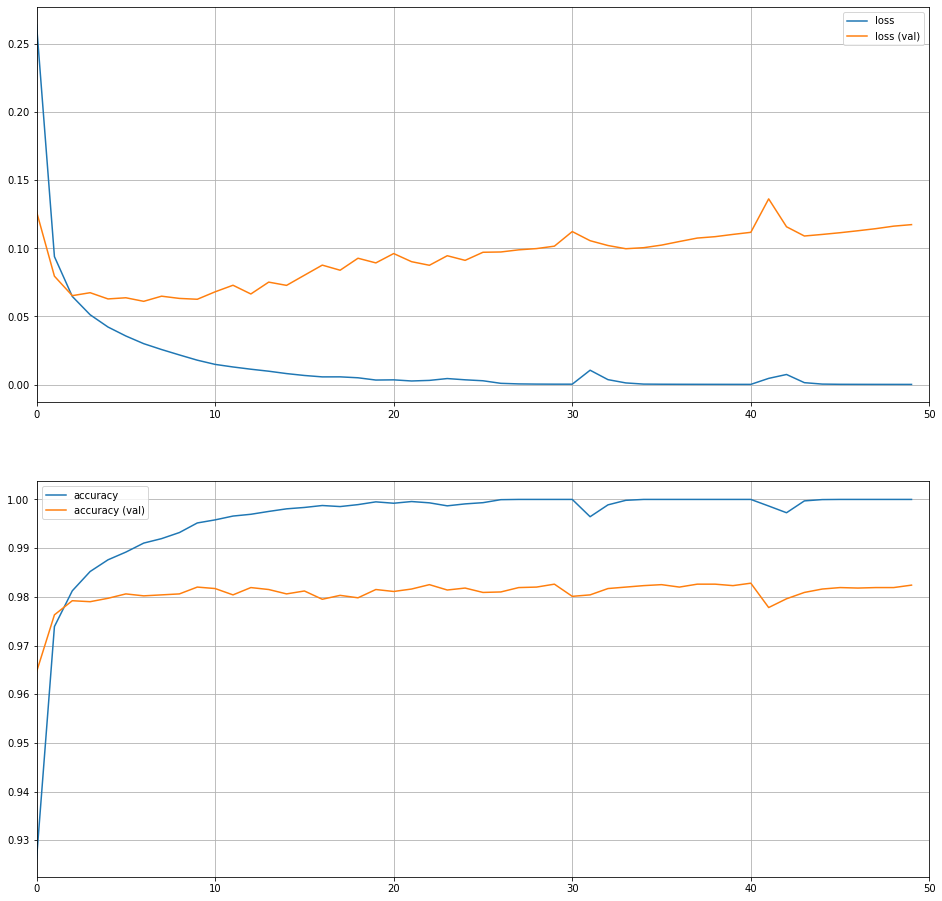

In [102]:
plt.figure(figsize=(16,16))
plt.subplot(211)
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="loss (val)")
plt.grid()
plt.xlim( (0,N_epoch) )
plt.legend()

plt.subplot(212)
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="accuracy (val)")
plt.grid()
plt.xlim( (0,N_epoch) )
plt.legend()